# Maximizing Revenue for taxi drivers through payment type Analysis --
 
**Problem Statement** - Our reasearch  aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between 
payment type and fare amount.


**Objective** - The project's main goal is to run A/B test to examine the relationship between the total payment and method of payment.  We use python hypothesis testing and descriptive statistics to extract useful information that can help  taxi drivers generate more cash.

**Research Question** - Is there a relationship between total fare amount and payment type and can be nudge customers towards payment methods that generate higher revenue for drivers without negatively impacting customer experience?

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [72]:
#Loading the data set
taxi_data = pd.read_csv('yellow_tripdata_2020-01.csv')
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [73]:
#EDA (Exploratory Data Analysis)
#data types of data
taxi_data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [74]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

In [76]:
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

In [77]:
# Calculating duration from the pickup and dropoff datetime in minutes
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']
taxi_data['duration']= taxi_data['duration'].dt.total_seconds()/60

In [9]:
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [78]:
taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'duration']

In [79]:
taxi_data.columns = taxi_data.columns.str.strip() #Removes the extra space

There are so many columns in the dataset, but as per our problem statement, we only require some fields from the original data. Rest columns are nothing but the unwanted columns for this study. So we will simply remove those columns. 

As the problem statement is revolving around the payment type, fare amount, and any other factor influencing the fare amount, we will filter the data to have only passenger count, trip distance, payment type, fare amount and duration of the trip.

In [85]:
# removing unwanted columns
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [87]:
#check for missing values
taxi_data.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [88]:
 # percentage of missing data to the total record of the data
65441/taxi_data.shape[0]*100

1.0322629289981475

In [89]:
taxi_data.dropna(inplace = True)  #drop null values

In [90]:
taxi_data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
6339562,1.0,2.10,1.0,11.0,14.233333
6339563,1.0,2.13,1.0,13.0,19.000000
6339564,1.0,2.55,1.0,12.5,16.283333
6339565,1.0,1.61,2.0,8.5,9.633333


In [92]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [93]:
taxi_data[taxi_data.duplicated()]  #check for duplicate values

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [94]:
taxi_data.drop_duplicates(inplace= True) #drop dupilicate values

In [95]:
taxi_data.shape

(3007861, 5)

In [96]:
taxi_data['passenger_count'].value_counts(normalize = True)


passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [97]:
taxi_data['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [98]:
taxi_data = taxi_data[taxi_data['payment_type']<3]
taxi_data = taxi_data[(taxi_data['passenger_count']>0) & (taxi_data['passenger_count']<6)]

In [99]:
taxi_data.shape

(2780283, 5)

In [100]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
taxi_data['payment_type'].replace ([1,2],['card','cash'],inplace= True)

In [101]:
taxi_data.describe()  #Descriptive statistics of data

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [102]:
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x11d4f1ede50>,
 'caps': [<matplotlib.lines.Line2D at 0x11d4f1ee0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d4f1edd10>],
 'medians': [<matplotlib.lines.Line2D at 0x11d4f1ee350>],
 'fliers': [<matplotlib.lines.Line2D at 0x11d4f1ee490>],
 'means': []}

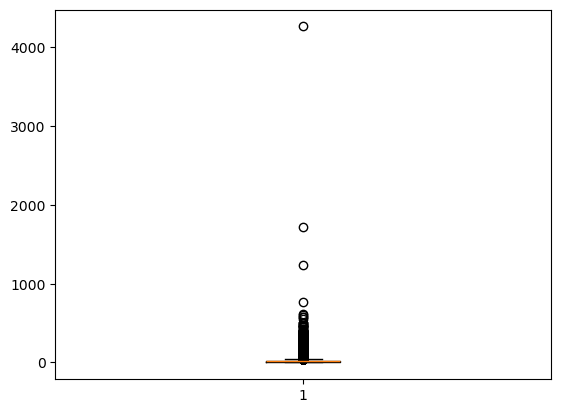

In [103]:
#Check for the outliers by visualization
plt.boxplot(taxi_data['fare_amount'])

In [104]:
for col in ['fare_amount','trip_distance','duration']:
   q1= taxi_data[col].quantile(0.25)
   q3= taxi_data[col].quantile(0.75)
   IQR = q3-q1

   lower_bound = q1-1.5*IQR
   upper_bound = q3+1.5*IQR
   taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

<function matplotlib.pyplot.show(close=None, block=None)>

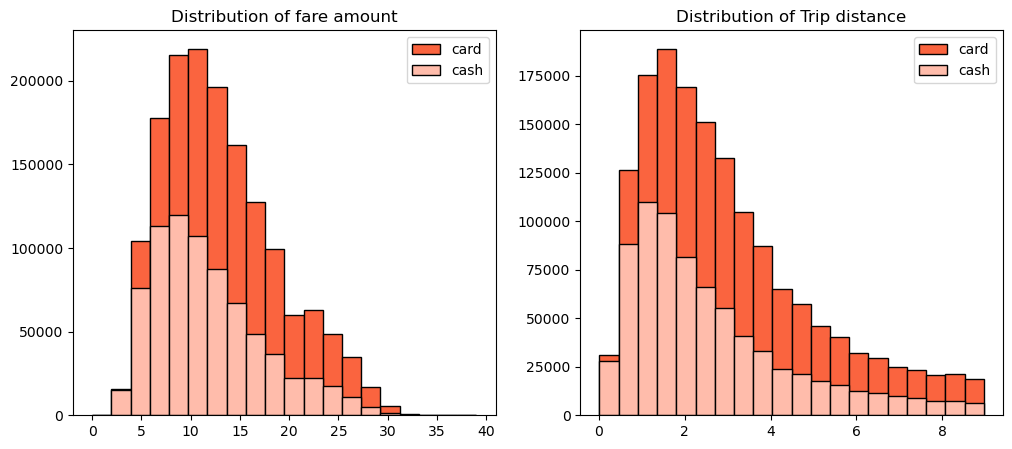

In [105]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(taxi_data[taxi_data['payment_type']== 'card'] ['fare_amount'], histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FA643F', label  = 'card')
plt.hist(taxi_data[taxi_data['payment_type']== 'cash'] ['fare_amount'], histtype = 'barstacked',bins = 20 , edgecolor = 'k', color = '#FFBCAB', label = 'cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip distance')
plt.hist(taxi_data[taxi_data['payment_type']== 'card'] ['trip_distance'], histtype = 'barstacked',bins = 20, edgecolor = 'k', color = '#FA643F', label  = 'card')
plt.hist(taxi_data[taxi_data['payment_type']== 'cash'] ['trip_distance'], histtype = 'barstacked',bins = 20 , edgecolor = 'k', color = '#FFBCAB', label = 'cash')
plt.legend()
plt.show

In [106]:
taxi_data.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance': ['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.


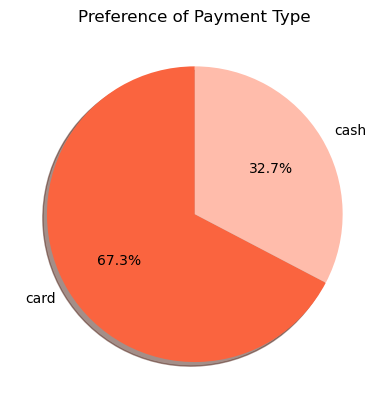

In [107]:
plt.title('Preference of Payment Type')
plt.pie(
    taxi_data['payment_type'].value_counts(normalize=True),
    labels=taxi_data['payment_type'].value_counts().index,
    startangle=90,
    shadow=True,
    autopct='%1.1f%%',
    colors=['#FA643F', '#FFBCAB']
)
plt.show()

In [108]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename (columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

In [109]:
#Calculating the percentage of each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [110]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [111]:
# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame (columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['card','cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:10,-1]
df

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


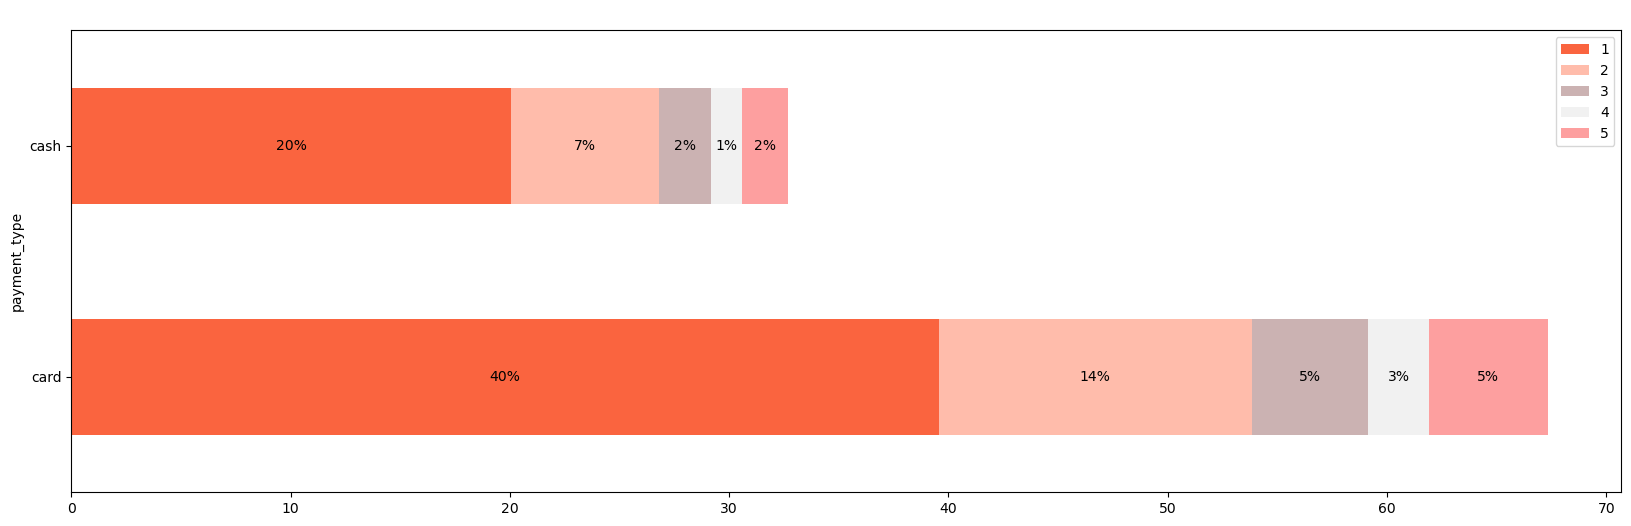

In [112]:
fig, ax = plt.subplots(figsize=(20, 6)) 
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

In [113]:
#Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash. 

**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash



In [ ]:
#create Q-Q plot with 45-degree line added to plot
sm.qqplot(taxi_data['fare_amount'], line = '45')
plot.show()

In [116]:
# Sample 1
card_sample = taxi_data[taxi_data['payment_type']== 'card']['fare_amount']
#Sample 2
cash_sample = taxi_data[taxi_data['payment_type']== 'cash']['fare_amount']

In [117]:
t_stats , p_value = st.ttest_ind(a = card_sample, b= cash_sample, equal_var = False)
print('T statistic', t_stats,'p_value',p_value)

T statistic 169.2111527245052 p_value 0.0


In [118]:
# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")


Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.